### Models Evaluation

In [67]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import load_model

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [68]:
np.random.seed(42)
tf.random.set_seed(42)

In [71]:
dataset = pd.read_csv("dataset_extracted/features_3_sec_extracted.csv")
dataset = dataset.drop(labels="filename", axis=1)

In [72]:
# Get classes and encode these to numerical values (0 to 9)

class_list = dataset.iloc[:, -1]
convertor = LabelEncoder()
y = convertor.fit_transform(class_list)

In [73]:
# Get all data except label and standardize features

fit = StandardScaler()
X = fit.fit_transform(np.array(dataset.iloc[:, :-1], dtype = float))
X.shape

(9981, 58)

In [74]:
# Split data into train, validation and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### FFNN Evaluation

In [75]:
loaded_model_ffnn = load_model("checkpoints/trained_ffnn_3_sec.keras")
y_pred_ffnn = loaded_model_ffnn.predict(X_test)
y_pred_ffnn_classes = np.argmax(y_pred_ffnn, axis=1)
test_accuracy_fnn = accuracy_score(y_test, y_pred_ffnn_classes)
print(f"Test Accuracy: {test_accuracy_fnn:.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step
Test Accuracy: 0.9229


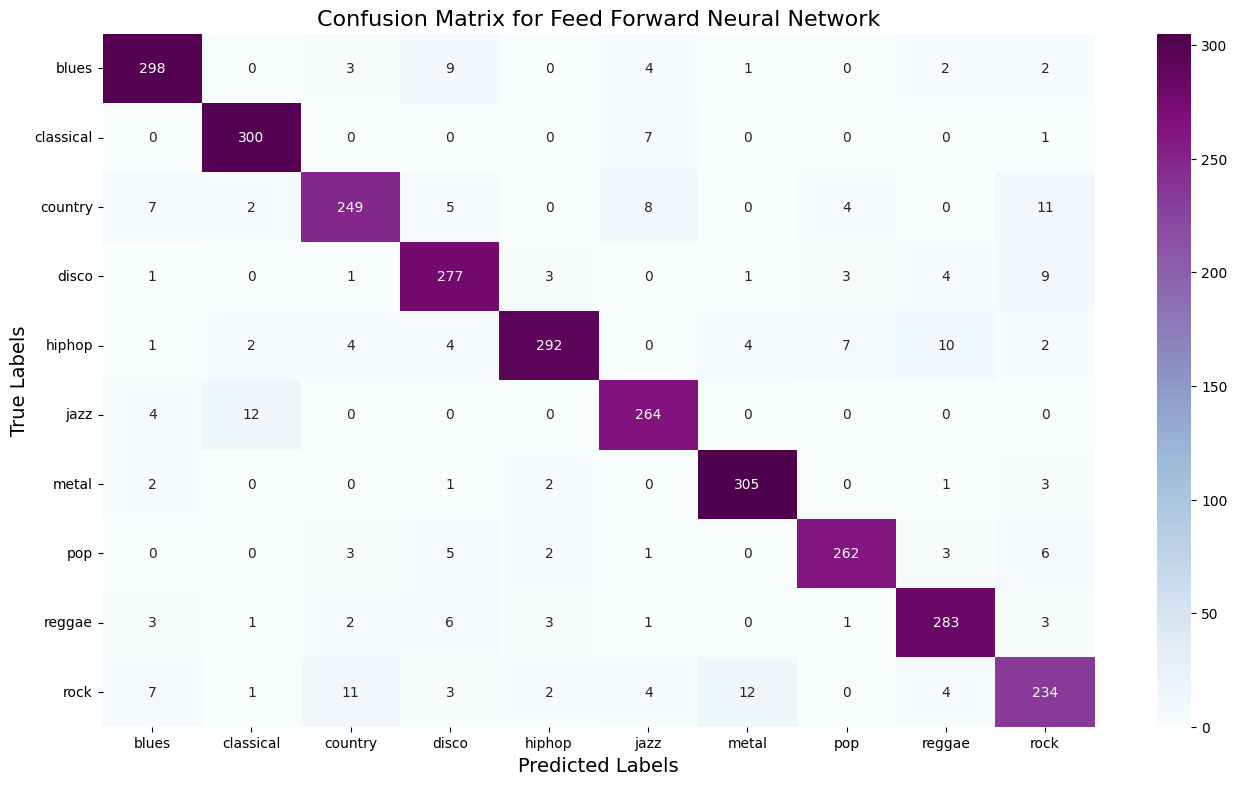

In [82]:
con_mat_ffnn = confusion_matrix(y_test, y_pred_ffnn_classes)
plt.figure(figsize = (16, 9))
labels = convertor.inverse_transform(sorted(set(y_pred_ffnn_classes)))

sns.heatmap(con_mat_ffnn, annot=True, fmt="g", cmap="BuPu", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.title("Confusion Matrix for Feed Forward Neural Network", fontsize=16)
plt.xticks()
plt.yticks(rotation=0)
plt.show()

### CNN Evaluation

In [77]:
loaded_model_cnn = load_model("checkpoints/trained_cnn_3_sec.keras")
y_pred_cnn = loaded_model_cnn.predict(X_test)
y_pred_cnn_classes = np.argmax(y_pred_cnn, axis=1)
test_accuracy_cnn = accuracy_score(y_test, y_pred_cnn_classes)
print(f"Test Accuracy: {test_accuracy_cnn:.4f}")

71/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

2025-01-27 17:31:34.368369: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_88', 4 bytes spill stores, 4 bytes spill loads



94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Test Accuracy: 0.9055


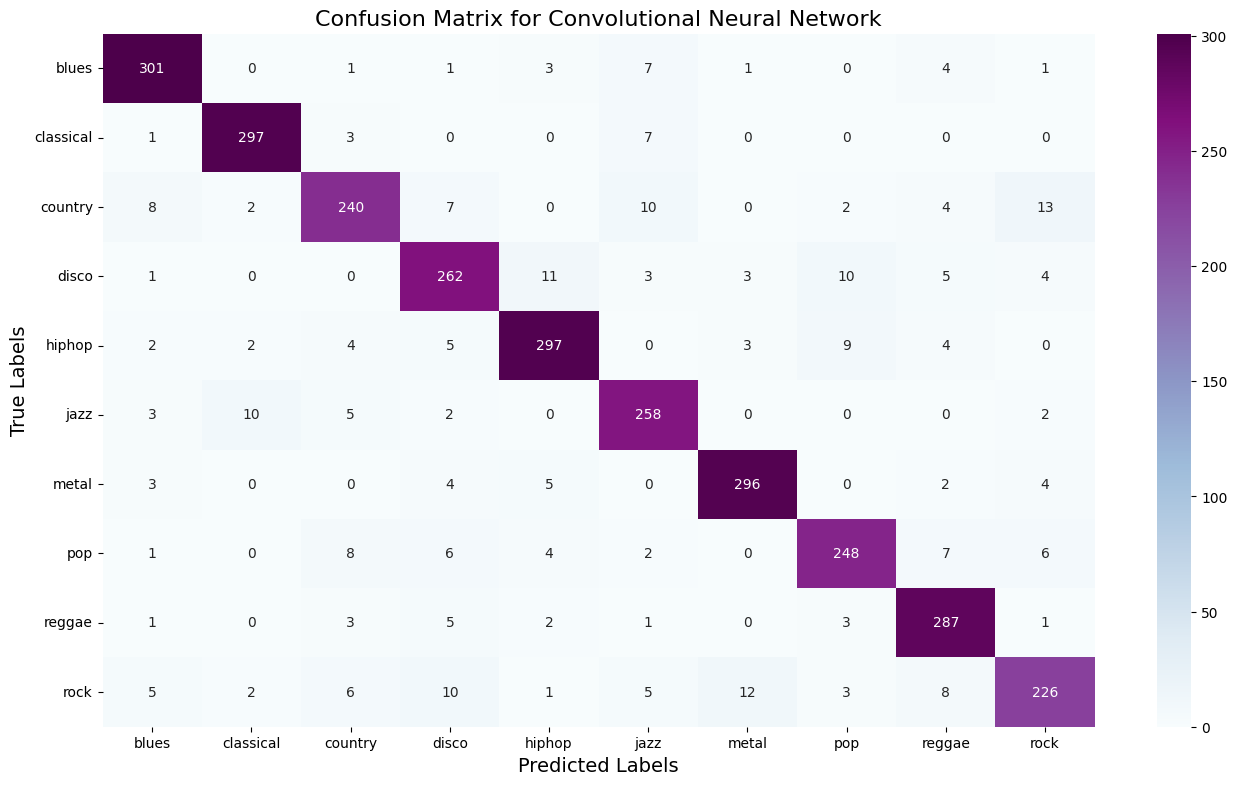

In [83]:
con_mat_cnn = confusion_matrix(y_test, y_pred_cnn_classes)
plt.figure(figsize = (16, 9))
labels = convertor.inverse_transform(sorted(set(y_pred_cnn_classes)))

sns.heatmap(con_mat_cnn, annot=True, fmt="g", cmap="BuPu", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.title("Confusion Matrix for Convolutional Neural Network", fontsize=16)
plt.xticks()
plt.yticks(rotation=0)
plt.show()

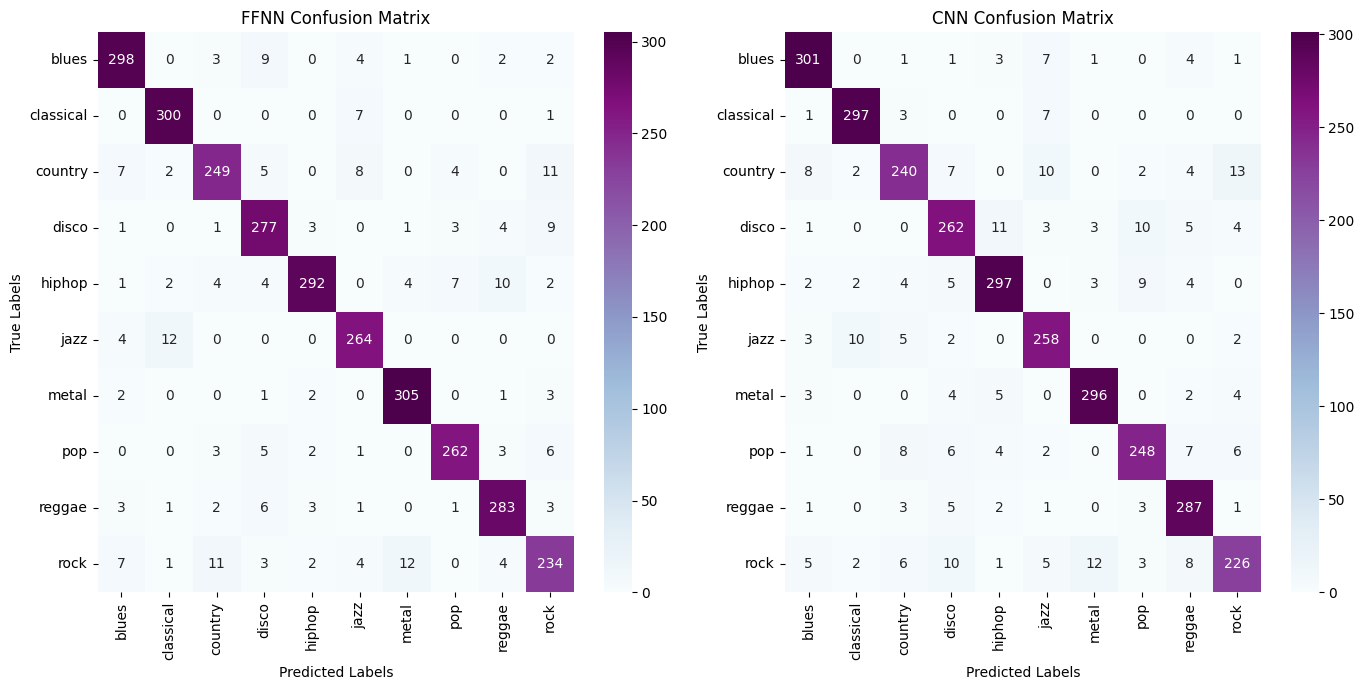

In [79]:
conf_matrix_ffnn = confusion_matrix(y_test, y_pred_ffnn_classes)
conf_matrix_cnn = confusion_matrix(y_test, y_pred_cnn_classes)

labels = convertor.inverse_transform(sorted(set(y_pred_ffnn_classes)))

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_ffnn, annot=True, fmt="g", cmap="BuPu", xticklabels=labels, yticklabels=labels)
plt.title("FFNN Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_cnn, annot=True, fmt="g", cmap="BuPu", xticklabels=labels, yticklabels=labels)
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.tight_layout()
plt.show()

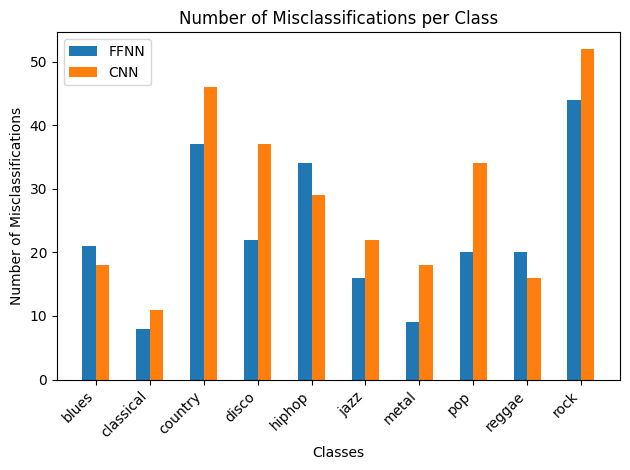

In [81]:
classes_numerical = np.unique(sorted(set(y_pred_cnn_classes)))
classes_name = np.unique(convertor.inverse_transform(sorted(set(y_pred_cnn_classes))))

misclassifications_ffnn = []
misclassifications_cnn = []

for class_numerical in classes_numerical:
    misclassifications_ffnn.append(
        np.sum((y_test == class_numerical) & (y_pred_ffnn_classes != class_numerical))
    )
    misclassifications_cnn.append(
        np.sum((y_test == class_numerical) & (y_pred_cnn_classes != class_numerical))
    )

x = np.arange(len(classes_numerical)) * 2.0
width = 0.5

plt.bar(x - width/2, misclassifications_ffnn, width, label='FFNN')
plt.bar(x + width/2, misclassifications_cnn, width, label='CNN')
plt.xlabel('Classes')
plt.ylabel('Number of Misclassifications')
plt.xticks(x, classes_name, rotation=45, ha='right')
plt.legend()
plt.title('Number of Misclassifications per Class')
plt.tight_layout() 
plt.show()